# Sprint 機械学習スクラッチ 線形回帰

## 1.このSprintについて
### Sprintの目的
スクラッチを通して線形回帰を理解する
オブジェクト指向を意識した実装に慣れる
数式をコードに落とし込めるようにする
### どのように学ぶか
スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。

## 2.線形回帰スクラッチ
線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。


### 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

`雛形`  
クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

### インポート

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 手作りデータ作成

In [2]:
X = np.array([[-1, 2, 3, 4], [4, -5, 6, 7], [7, 8, -9, 10]])
X

array([[-1,  2,  3,  4],
       [ 4, -5,  6,  7],
       [ 7,  8, -9, 10]])

In [3]:
X.shape

(3, 4)

In [4]:
# shita = [rd.random() for i in range(4)]
# print(shita)

### データ作成

In [5]:
# DLしたデータは個人的に別ディレクトリに保存したいのでosライブラリをインポート
import os
os.getcwd()

'/Users/tominagashuuji/workspace/dic_ml/1910/sprint'

In [7]:
#仮データを作成（HousePrise）
df = pd.read_csv("../../data/house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# 特徴量の分割
X = df.loc[:, ["GrLivArea", "YearBuilt"]].values

In [9]:
# クラスの分割
y = df.loc[:, ["SalePrice"]].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.25, #検証用データをどれくらいの比率にするか指定
    random_state=42 #ランダム具合の調整
)

### クラス生成

In [11]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=10, lr=0.01, bias=True, verbose=True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.h = None
        self.j_theta = None
        self.error = None
        self.theta = np.zeros((100, 3))

    def _linear_hypothesis(self, X): # 問1 
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        #(サンプル数 x 特徴量数) @ (特徴量数 x 1) = (サンプル数 x 1)
        self.h = np.dot(X, self.theta)
        return self.h
    
    def _get_error(self, y):
        """
        説明を記述
        """
        self.error = self.h - y # self.errorは予測値と実績値の誤差を求める
        return self.error

    def _gradient_descent(self, X): # 問2 最急降下法
        m = X.shape[0] # m はサンプル数の平均を出す時に使うので、Xのレコード数を取得
#         self.theta = self.theta - (self.lr / m *(X.T@self.error).sum())
        print("self.theta{}".format(self.theta))
        print("self.lr / m *(X.T@self.error).sum(){}".format(self.lr / m *(X.T@self.error).sum()))
#         self.theta = self.theta - self.lr / m *(X.T@self.error).sum()
        self.theta = self.theta - self.lr/m*(self.error.T@X).sum()
        print("self.theta.shape{}".format(self.theta.shape))
        print("self.theta{}".format(self.theta))

        return self.theta

    def loss_function(self, error):
        m = error.shape[0]
        self.j_theta = (error**2).sum()/2/m
#         print("m{}".format(m))

        return self.j_theta

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # 検証用データの有無を判断する。
        self.val_enable = False
        if X_val is not None:
            self.val_enable = True

        # bias（切片）の有無を判定し、有なら切片に影響が出ないように0列目に1を追加する
        if self.bias:
            X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
            if self.val_enable:
                X_val = np.concatenate([np.ones((X_val.shape[0], 1)), X_val], axis=1)

        # 適当なthetaを用意する（これを更新して正解に近づけて行くイメージ）
        self.theta = np.array([rd.random() for i in range(3)])

        for i in range(self.iter):
            # 訓練用データの処理
            self._linear_hypothesis(X)# 引数のself は不要
            self._get_error(y)
            self._gradient_descent(X)
            self.loss_function(self.error) # 最適化されたthetaで目的関数を算出
            self.loss[i] = self.j_theta # 問5、目的関数算出

            if self.val_enable:
                # 検証用データの処理
                self._linear_hypothesis(X_val)# 引数のself は不要
                self._get_error(y_val)
                self._gradient_descent(X_val)
                self.loss_function(self.error) # 最適化されたthetaで目的関数を算出           
                self.val_loss[i] = self.j_theta # 問5、目的関数算出
            
        if self.verbose:
            print("self.loss{}".format(self.loss))
            print("self.val_loss{}".format(self.val_loss))
            #verboseをTrueにした際は学習過程を出力
            self.learning_curve()
            print()
        return

    def predict(self, X):# 問3 推定
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
#      切片の確認、学習後に再度実行するので
        n_samples = X.shape[0]
        if self.bias:
            X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

        #(サンプル数 x 特徴量数) @ (特徴量数 x 1) = (サンプル数 x 1)
        y_pred = np.dot(X, self.theta)

        return y_pred
    
    def learning_curve(self):
        plt.title("model loss")
        plt.xlabel("iter")
        plt.ylabel("loss")
        plt.plot(np.arange(self.iter), self.loss, label="train_loss")
        if self.val_enable:
            plt.plot(np.arange(self.iter), self.val_loss, label="val_loss")
        plt.legend()
        plt.show()


### インスタンス化

In [12]:
slr = ScratchLinearRegression()

###  学習（線形回帰） 問１、問２動作確認、問５

self.theta[0.04216766 0.38816062 0.63167849]
self.lr / m *(X.T@self.error).sum()-7225282225.112826
self.theta.shape(3,)
self.theta[7.22528223e+09 7.22528223e+09 7.22528223e+09]
self.theta[7.22528223e+09 7.22528223e+09 7.22528223e+09]
self.lr / m *(X.T@self.error).sum()3.122535179871733e+17
self.theta.shape(3,)
self.theta[-3.12253511e+17 -3.12253511e+17 -3.12253511e+17]
self.theta[-3.12253511e+17 -3.12253511e+17 -3.12253511e+17]
self.lr / m *(X.T@self.error).sum()-4.196443964183406e+25
self.theta.shape(3,)
self.theta[4.19644393e+25 4.19644393e+25 4.19644393e+25]
self.theta[4.19644393e+25 4.19644393e+25 4.19644393e+25]
self.lr / m *(X.T@self.error).sum()1.8135684532624e+33
self.theta.shape(3,)
self.theta[-1.81356841e+33 -1.81356841e+33 -1.81356841e+33]
self.theta[-1.81356841e+33 -1.81356841e+33 -1.81356841e+33]
self.lr / m *(X.T@self.error).sum()-2.437294682341757e+41
self.theta.shape(3,)
self.theta[2.43729466e+41 2.43729466e+41 2.43729466e+41]
self.theta[2.43729466e+41 2.43729466e+41 2.

/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in square


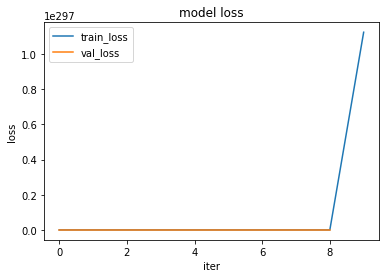

In [13]:
slr.fit(X_train, y_train, X_test, y_test)

### 推定 問3

In [14]:
# y_pred = reg.predict(X_test)# 検証用データを推定させる
y_pred = slr.predict(X_test)

print("y_pred{}".format(y_pred))

y_pred[-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 -8.48192808e+162
 -8.51950030e+162 -6.11253012e+162 -9.14413841e+162 -8.06628542e+162
 -6.10783359e+162 -7.86433476e+162 -7.99818578e+162 -6.67611338e+162
 -6.64558595e+162 -8.31285310e+162 -8.66744090e+162 -6.95555675e+162
 -8.74728187e+162 -7.26787580e+162 -6.88745710e+162 -8.17900208e+162
 -8.83181935e+162 -8.45140065e+162 -8.17665381e+162 -6.79352656e+162
 -8.05689237e+162 -7.49800564e+162 -7.86198649e+162 -6.61271026e+162
 -8.45844544e+162 -7.88781739e+162 -7.42286120e+162 -9.51046753e+162
 -1.18188106e+163 -6.83109878e+162 -8.55472425e+162 -7.28431365e+162
 -9.05255613e+162 -9.23337243e+162 -1.06000618e+163 -6.66672033e+162
 -7.30544802e+162 -9.63962203e+162 -6.86162620e+162 -9.51281580e+162
 -6.92737758e+162 -9.60674634e+162 -6.75595434e+162 -6.86162620e+162
 -1.01092747e+163 -8.17900208e+162 -6.90154669e+162 -8.32459442e+162
 -7.70465283e+162 -1.14477850e+163 -6.69959602e+162 -8.78250582e+162
 -8.85060546e+162 -7.2890101

### 評価（問4、平均２乗誤差）

In [15]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """

#     print("y_pred{}".format(y_pred.shape))
#     print(y_pred.reshape(365, 1).shape)
#     print("y{}".format(y.shape))
    m = y.shape[0]
    mse = ((y_pred - y)**2).sum()/m
#     print(((y_pred.reshape(365, 1) - y)**2).shape)
#     print(mse.shape)
#     mse2 = np.average((y_pred.reshape(365, 1) - y)**2)
#     print(mse2.shape)
    print("m{}".format(m))
#     print("y_pred{}".format(y_pred))
#     print("y{}".format(y))
    print("(y_pred - y)){}".format((y_pred - y)))
    print("(y_pred - y)**2{}".format((y_pred - y)**2))
    print(" ((y_pred - y)**2).sum(){}".format(((y_pred - y)**2).sum()))
    
    print("mse{}".format(mse))
#     print("mse2{}".format(mse2))
    return mse

In [16]:
mse = MSE(y_pred, y_test)
print(type(mse))
print(mse)

m365
(y_pred - y))[[-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]
 [-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]
 [-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]
 ...
 [-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]
 [-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]
 [-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]]
(y_pred - y)**2[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]
 ((y_pred - y)**2).sum()inf
mseinf
<class 'numpy.float64'>
inf


/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square
/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in square
/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in square


In [17]:
# 評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使う。
#MSEは値が小さいほど精度が高いです。
print("MSE : {}".format(MSE(y_pred, y_test)))

# 推定値を表示
print(y_pred)

m365
(y_pred - y))[[-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]
 [-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]
 [-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]
 ...
 [-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]
 [-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]
 [-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 ... -9.79695569e+162
  -9.02907350e+162 -7.29840323e+162]]
(y_pred - y)**2[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]
 ((y_pred - y)**2).sum()inf
mseinf
MSE : inf
[-7.11993520e+162 -1.08419330e+163 -6.94146717e+162 -8.481

/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square
/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in square
/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in square


### 目的関数（損失関数）

In [18]:
# slr.loss_function()
# loss_functionはfitの中で動かす。
# loss_functionは引数としてerrorを投入する必要があるが、
# errorはfitで生成されるのでslr.loss_function(error)が使えない

###  可視化

plt.title("linear_hypothesis_list")
plt.xlabel("theta")
plt.ylabel("SalePrice")
plt.plot(loss_list, color='green', marker='o', linestyle='dashed',
         linewidth=1, markersize=2) # 「リスト名」のところに問５のリストの変数名を入れる
plt.plot(val_loss, color='red', marker='x', linestyle='dashed',
         linewidth=1, markersize=2) # 「リスト名」のところに問５のリストの変数名を入れる
plt.show()

# ------------以下から動作確認のセル------------

In [19]:
# # データの読み込み
# df = pd.read_csv("../../dic_ml_ans/house-prices-advanced-regression-techniques/train.csv")
# X = df.loc[:,['GrLivArea','YearBuilt']].values
# y = df.SalePrice.values

In [20]:
# # データの前処理
# X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
# # 標準化
# X_train_std = (X_train - X_train.mean()) / X_train.std()
# X_test_std = (X_test -X_test.mean()) / X_test.std()
# y_train_std = (y_train - y_train.mean()) / y_train.std()
# y_test_std = (y_test - y_test.mean()) / y_test.std()

In [21]:
# # バイアス項の追加
# X_1 = np.insert(X_test_std, 0, 1, axis=1)
# # シータの初期値
# coef = np.random.rand(X_1.shape[1])
# # パラメータ
# lr = 0.001

# # shapeの確認
# print('X_1_shape :',X_1.shape)
# print('coef_shape： 　',coef.shape)

In [22]:
# def _linear_hypothesis(X,coef):
#     """
#     線形の仮定関数を計算する

#     Parameters
#     ----------
#     X : 次の形のndarray, shape (n_samples, n_features)
#       学習データ

#     Returns
#     -------
#       次の形のndarray, shape (n_samples, 1)
#       線形の仮定関数による推定結果

#     """
#     hypothesis = np.dot(X,coef)
#     return hypothesis

In [23]:
# hypothesis = _linear_hypothesis(X_1, coef)
# print('hypothesis_shape: ' , hypothesis.shape, '\n')
# print(hypothesis)

### 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

In [24]:
# 20191213
def _linear_hypothesis(theta, X): # 問1 
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    #(サンプル数 x 特徴量数) @ (特徴量数 x 1) = (サンプル数 x 1)
#         print(X.shape)
#         print(self.theta.shape)
    h = np.dot(X, theta)
#         print(self.h.shape)
#         print("self.h.shape{}".format(self.h.shape))
#         print("self.h{}".format(self.h))
    return h

In [25]:
#仮データを作成（HousePrise）
# バイアス項の追加
X_1 = np.insert(X_test, 0, 1, axis=1)
# シータの初期値
theta = np.random.rand(X_1.shape[1])
# パラメータ
lr = 0.001

# shapeの確認
print('X_1_shape :',X_1.shape)
print('theta_shape： 　',theta.shape)

X_1_shape : (365, 3)
theta_shape： 　 (3,)


In [26]:
# shapeと中身確認
h = _linear_hypothesis(theta, X_1)
print("h{}".format(h.shape))
print("h{}".format(h[:10]))

h(365,)
h[2539.69530258 3817.1615581  2476.7014734  3005.78081416 3021.68536691
 2194.80984884 3232.38367868 2864.86101778 2193.09905034 2794.4726914 ]


### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

`雛形`  
ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。  
雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

In [27]:
# 20191212
def _gradient_descent(theta, X): # 問2 最急降下法
    m = X.shape[0] # m はサンプル数の平均を出す時に使うので、Xのレコード数を取得
#     self.theta = self.theta - self.lr/m*(self.error.T@X).sum()
    theta = theta - lr/m*(np.dot(error.T, X))

    return theta

In [28]:
# print("X_1{}".format(X[:10]))
print("X_1_shape{}".format(X_1.shape))
# print("h{}".format(h[:10]))
print("h_shape{}".format(h.shape))
print("theta_shape{}".format(theta.shape))
print("h_shape{}".format(h.shape))

print("y_test_shape{}".format(y_test.shape))
y_test.reshape(-1,1)
print("y_test_shape{}".format(y_test.shape))
y_test = np.ravel(y_test)
print("y_test_r_shape{}".format(y_test.shape))

print("X_test_shape{}".format(X_test.shape))

X_1_shape(365, 3)
h_shape(365,)
theta_shape(3,)
h_shape(365,)
y_test_shape(365, 1)
y_test_shape(365, 1)
y_test_r_shape(365,)
X_test_shape(365, 2)


In [29]:
error = _linear_hypothesis(theta , X_1) - y_test
print("error_shape{}".format(error.shape))
# print("error{}".format(error))

error_shape(365,)


### 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

`仮定関数 `
h
θ
(
x
)
 の出力が推定結果です。

In [30]:
def predict(theta, X):
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    print(X.shape)
    print(theta.shape)
    #(サンプル数 x 特徴量数) @ (特徴量数 x 1) = (サンプル数 x 1)
    y_pred = np.dot(X, theta)

    pass
    return y_pred

In [31]:
y_pred = predict(theta, X_1)
print(y_pred)

(365, 3)
(3,)
[2539.69530258 3817.1615581  2476.7014734  3005.78081416 3021.68536691
 2194.80984884 3232.38367868 2864.86101778 2193.09905034 2794.4726914
 2838.99577009 2387.80493554 2375.67648861 2950.69532444 3072.04662079
 2482.84212561 3099.61781003 2590.25820781 2457.83389614 2904.76068632
 3126.2279174  2998.3911739  2904.05652558 2427.44930193 2862.69974172
 2670.81049946 2796.28917251 2365.21328429 3000.25159192 2805.09361017
 2640.76584325 3361.18797997 4149.61608789 2440.32908447 3033.7097502
 2596.14517685 3201.54374995 3266.19958376 3734.19754518 2383.98003587
 2601.82725658 3405.00851691 2451.55010033 3362.24503057 2473.5855914
 3387.99164379 2414.97282209 2451.29803615 3566.71157834 2902.49210866
 2464.1761997  2953.35910989 2740.79228519 4023.94062044 2397.66966176
 3111.74301899 3134.4826708  2598.36010371 2590.25982679 2338.85038415
 2067.76837785 2679.56128632 3705.77257568 2930.77231558 3146.4078474
 3406.01029772 2492.65158204 3535.06504422 2487.97775905 2884.43437

### 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

L
(
θ
)
=
1
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.
m
 : 入力されるデータの数

h
θ
(
)
 : 仮定関数

x
(
i
)
 : i番目のサンプルの特徴量ベクトル

y
(
i
)
 : i番目のサンプルの正解値

なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

雛形

In [32]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    m = y.shape[0]
#     mse = ((y_pred - y)**2).sum()/m
    mse = ((y_pred - y)**2).mean()
    return mse

In [33]:
mse = MSE(y_pred, y_test)
# print("mse:{}".format(MSE(y_pred, y_test)))
print(type(mse))
print("mse:{}".format(mse))

<class 'numpy.float64'>
mse:37813516233.66159


### 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

In [34]:
# 目的関数実装 20191213
#     m = error.shape[0]
#     j_theta = (error.sum())**2/2/m
objective_func = MSE(y_pred, y_test)/2
print(objective_func)
# 問６のクラス内に実装する

18906758116.830795


## 3.検証
### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [35]:
class ScratchLinearRegression():

    def __init__(self, num_iter=100, lr=0.000000001, bias=True, verbose=True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _linear_hypothesis(self, X): # 問1 
        self.h = np.dot(X, self.theta)
        return self.h

    def _get_error(self, y):
        self.error = self.h - np.ravel(y)
#         print("self.error:{}".format(self.error))
#         print("self.h:{}".format(self.h[:3]))
#         print("np.ravel(y):{}".format(np.ravel(y)[:3]))

        return self.error

    def _gradient_descent(self, X): # 問2 最急降下法
        m = X.shape[0] # m はサンプル数の平均を出す時に使うので、Xのレコード数を取得
#         print("self.theta:{}".format(self.theta))
#         print("np.dot(self.error.T, X):{}".format(np.dot(self.error.T, X)))
#         print("self.lr:{}".format(self.lr))
#         print("m:{}".format(m))
#         print("self.error:{}".format(self.error[:5]))
#         print("self.lr/m * np.dot(self.error.T, X):{}".format(self.lr/m * np.dot(self.error.T, X)))
# error が大きくなってしまうのでそれを抑える為に self.lrを非常に小さくした所回答に近くなった。
        self.theta = self.theta - self.lr/m * np.dot(self.error.T, X)
#         print("self.theta:{}".format(self.theta))
        return self.theta

    def MSE(self, y_pred, y):
        m = y.shape[0]
    #     mse = ((y_pred - y)**2).sum()/m
        self.mse = ((y_pred - y)**2).mean()
        return self.mse
    
    def loss_function(self, error):
        m = self.theta.shape[0]
        self.j_theta = (self.error**2).mean()/2
        return self.j_theta

    def fit(self, X, y, X_val=None, y_val=None):
        # 検証用データの有無を判断する。
        self.val_enable = False
        if X_val is not None:
            self.val_enable = True

        # bias（切片）の有無を判定し、有なら切片に影響が出ないように0列目に1を追加する
        if self.bias:
            X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
            if self.val_enable:
                X_val = np.concatenate([np.ones((X_val.shape[0], 1)), X_val], axis=1)

        # 適当なthetaを用意する（これを更新して正解に近づけて行くイメージ）
        self.theta = np.array([rd.random() for i in range(3)])
#         print("self.theta:{}".format(self.theta))

        for i in range(self.iter):
            # 訓練用データの処理
            self._linear_hypothesis(X)# 引数のself は不要
            self._get_error(y)
            self._gradient_descent(X)
#             print("self.theta:{}".format(self.theta))
            self.loss_function(self.error) # 最適化されたthetaで目的関数を算出
            self.loss[i] = self.j_theta # 問5、目的関数算出
            
#             # lossを記録 （【問題５】目的関数の実装箇所）
#             self.loss[i] = self.MSE(self._linear_hypothesis(X),y)/2
            
            if self.val_enable:
                # 検証用データの処理
                self._linear_hypothesis(X_val)# 引数のself は不要
                self._get_error(y_val)
                self._gradient_descent(X_val)
#                 self.loss_function(self.error) # 最適化されたthetaで目的関数を算出           
#                 self.val_loss[i] = self.j_theta # 問5、目的関数算出

                # lossを記録 （【問題５】目的関数の実装箇所）
                self.val_loss[i] = self.MSE(self._linear_hypothesis(X_val),y_val)/2
            
        if self.verbose:
#             print("self.loss{}".format(self.loss))
#             print("self.val_loss{}".format(self.val_loss))
            #verboseをTrueにした際は学習過程を出力
            self.learning_curve()
            print()
        return

    def predict(self, X):
        #      切片の確認、学習後に再度実行するので
        n_samples = X.shape[0]
        if self.bias:
            X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        #(サンプル数 x 特徴量数) @ (特徴量数 x 1) = (サンプル数 x 1)
        print("Xs:{}".format(X.shape))
        print("self.thetas:{}".format(self.theta.shape))
        print("X:{}".format(X))
        print("self.theta:{}".format(self.theta))
        y_pred = np.dot(X, self.theta)
        return y_pred
    
    def learning_curve(self):
        plt.title("model loss")
        plt.xlabel("iter")
        plt.ylabel("loss")
        plt.plot(np.arange(self.iter), self.loss, label="train_loss")
        if self.val_enable:
            plt.plot(np.arange(self.iter), self.val_loss, label="val_loss")
        plt.legend()
        plt.show()


In [36]:
slr = ScratchLinearRegression()

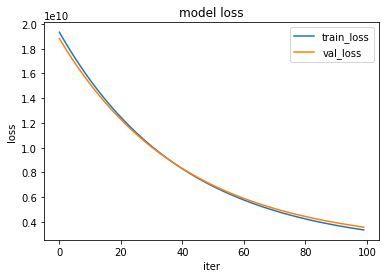

In [37]:
slr.fit(X_train, y_train, X_test, y_test)

In [38]:
y_pred = slr.predict(X_train)
print("y_pred:{}".format(y_pred))

Xs:(1095, 3)
self.thetas:(3,)
X:[[1.000e+00 1.504e+03 2.005e+03]
 [1.000e+00 1.309e+03 1.974e+03]
 [1.000e+00 1.258e+03 1.939e+03]
 ...
 [1.000e+00 8.640e+02 1.955e+03]
 [1.000e+00 1.426e+03 1.918e+03]
 [1.000e+00 1.555e+03 2.007e+03]]
self.theta:[ 0.76458536 35.68487496 39.92033897]
y_pred:[133711.09616654 125515.01504132 122297.87455431 ... 108876.75924399
 127454.606429   135610.86546741]


In [39]:
# サイキットラーンを使った線形回帰
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 予測モデルを作成
clf.fit(X_train, y_train)

# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X_train, y_train))

# 
y_pred_s = clf.predict(X_train)
print("y_pred_s:{}".format(y_pred_s[:5]))

[[  92.19202992 1056.00826855]]
[-2040959.50781461]
0.647270714473142
y_pred_s:[[214993.88361888]
 [164280.18145957]
 [122618.09853455]
 [159913.76508089]
 [159645.5891422 ]]


### 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

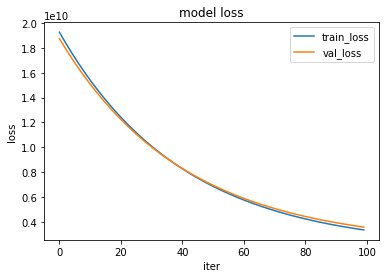

In [42]:
slr.fit(X_train, y_train, X_test, y_test)

# ------------以下から動作確認のセル------------

NameError: name 'loss_list' is not defined

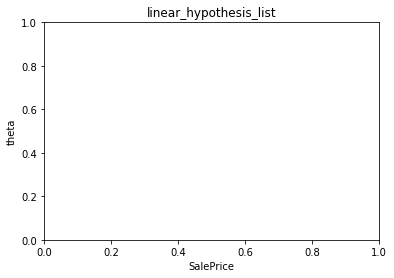

In [40]:
plt.title("linear_hypothesis_list")
plt.xlabel("SalePrice")
plt.ylabel("theta")
plt.plot(loss_list, color='green', marker='o', linestyle='dashed',
         linewidth=1, markersize=2) # 「リスト名」のところに問５のリストの変数名を入れる
plt.plot(val_loss, color='red', marker='x', linestyle='dashed',
         linewidth=1, markersize=2) # 「リスト名」のところに問５のリストの変数名を入れる
plt.show()

In [ ]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # testとtrain分割

# データの読み込み
# df = pd.read_csv('./train.csv')
X = df.loc[:,['GrLivArea','YearBuilt']].values
y = df.SalePrice.values

# データの前処理
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
# 標準化
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test -X_test.mean()) / X_test.std()
y_train_std = (y_train - y_train.mean()) / y_train.std()
y_test_std = (y_test - y_test.mean()) / y_test.std()

In [ ]:
class ScratchLinearRegression():

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X,coef):
        hypothesis = np.dot(X,coef)
        return hypothesis
    
    
    def _gradient_descent(self,X,coef,error):
        coef = coef - self.lr/len(X) * np.dot(error,X)
        return coef
    
    
    def MSE(self,y_pred, y):
        mse = np.mean((y_pred - y)**2)
        return mse

    
    def fit(self, X, y, X_val=None, y_val=None):
        # trainデータ
        #バイアス項を入れる場合はXの０列目に１を挿入する
        if self.bias is False:
            X_new = np.insert(X, 0, 1, axis=1)
        #バイアス項を入れない場合はXの０列目に０を挿入する
        else:
            X_new = np.insert(X, 0, 0, axis=1)

        # シータの初期化
        self.coef_ = np.random.rand(X_new.shape[1])
        # num_iter回更新
        for i in range(self.iter):
            # 仮定関数
            hypothesis = self._linear_hypothesis(X_new,self.coef_)
            
            # 予測と実測値との誤差
            error = hypothesis - y
            
            # 最急降下法
            self.coef_ = self._gradient_descent(X_new,self.coef_,error)
            
            # lossを記録 （【問題５】目的関数の実装箇所）
            self.loss[i] = self.MSE(self._linear_hypothesis(X_new,self.coef_),y)/2
        
            # 学習過程の出力
            if self.verbose is True:
                map_result = map(str, self.loss)
                result = ',\n'.join(map_result)                
                print('Train Data Loss Iteration{0}: \n{1}'.format(self.iter,result))
            else:
                pass
       
        # 検証用データがある場合
        if X_val is not None:
            #バイアス項を入れる場合はXの０列目に１を挿入する
            if self.bias is False:
                X_val_new = np.insert(X_val, 0, 1, axis=1)
            #バイアス項を入れない場合、0を挿入する
            else:
                X_val_new = np.insert(X_val, 0, 0, axis=1)
                
        # シータの初期化
        self.coef_val_ = np.random.rand(X_val_new.shape[1])
        # num_iter回更新
        for i in range(self.iter):
            # 仮定関数
            hypothesis_val = self._linear_hypothesis(X_val_new,self.coef_val_)
            
            # 予測と実測値との誤差
            error_val = hypothesis_val - y_val
            
            # 最急降下法
            self.coef_val_ = self._gradient_descent(X_val_new,self.coef_val_,error_val)
            
            # lossを記録　 （【問題５】目的関数の実装箇所）
            self.val_loss[i] = self.MSE(self._linear_hypothesis(X_val_new,self.coef_val_),y_val)/2
        
            # 学習過程の出力
            if self.verbose is True:
                map_result_val = map(str, self.val_loss)
                result_val = ',\n'.join(map_result_val)                
                print('\nTest Data Loss Iteration{0}: \n{1}'.format(self.iter,result_val))
            else:
                pass

            
    def predict(self,X):
        #バイアス項を入れる場合はXの０列目に１を挿入する
        if self.bias is False:
            X_add = np.insert(X, 0, 1, axis=1)
        #バイアス項を入れない場合、0を挿入する
        else:
            X_add = np.insert(X, 0, 0, axis=1)
            
        y_pred = np.dot(X_add,self.coef_).reshape(-1,1)
        return y_pred

In [ ]:
# 初期化，学習
slr=ScratchLinearRegression(num_iter=5000, lr=0.001, bias=False ,verbose=False)
slr.fit(X=X_train_std, y=y_train_std, X_val=X_test_std, y_val=y_test_std)

In [ ]:
# 推定
y_pred_train = slr.predict(X_train_std)
y_pred = slr.predict(X_test_std)
print('y_pred:\n',y_pred[:10])

In [ ]:
print('Train_MSE：',slr.MSE(y_pred_train,y_train_std))
print('Test_MSE：',slr.MSE(y_pred,y_test_std))
print('切片：',slr.coef_[0])
print('係数：',slr.coef_[1:])

In [ ]:
plt.scatter(np.array(range(slr.iter)), slr.loss, label="loss")
plt.scatter(np.array(range(slr.iter)), slr.val_loss, label="val_loss")

plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()

plt.show